In [ ]:
### 标准化 -- 列级别

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import sklearn.preprocessing as sp
import numpy as np

raw_samples = np.array([
    [17, 100, 4000.0],
    [20., 80., 5000],
    [23., 75., 5500]
])

## 每一列均值为0 标准差为1
std_samples = sp.scale(raw_samples)
print(std_samples)
print(std_samples.mean(axis=0))
print(std_samples.std(axis=0))

std_scaler = sp.StandardScaler()
X_std = std_scaler.fit_transform(raw_samples)
print(X_std)

In [1]:
### 范围缩放 -- 列级别

arr = np.array([17, 20 ,23])
arr_min = (arr - arr.min())
# arr_scale = arr_min / (arr.max() - arr.min())
arr_scale = arr_min / arr_min.max()
print(arr)
print(arr_min)
print(arr_scale)

### 特征缩放范围(0,1)--》可以自由变更
min_max_scaler = sp.MinMaxScaler(feature_range=(0, 1))
### 只能接受二维数组。方法是fit_transform--拟合转化, fit是拟合
print(min_max_scaler.fit_transform(arr.reshape(-1, 1)))

## 线性拟合
A = np.array([
    [17, 1],
    [23, 1]
])
B = np.array([
    [0],
    [1]
])
X = np.linalg.lstsq(A, B)
print(X[0][0], X[0][1])
print(X[0][0]*20 + X[0][1])

def min_max_scaler_func(X):
    X_copy = X.copy()
    for col in X_copy.T:
        col_min = col.min()
        col_max = col.max()
        A = np.array([[col_min, 1], [col_max, 1]])
        B = np.array([[0], [1]])
        x = np.linalg.lstsq(A, B)[0]
        col *= x[0]
        col += x[1]
    return X_copy
# min_max_scaler_func(raw_samples)

print(min_max_scaler.fit_transform(raw_samples))
print(min_max_scaler_func(raw_samples))

[[-1.22474487  1.38873015 -1.33630621]
 [ 0.         -0.46291005  0.26726124]
 [ 1.22474487 -0.9258201   1.06904497]]
[ 0.00000000e+00 -3.70074342e-17  5.18104078e-16]
[1. 1. 1.]
[[-1.22474487  1.38873015 -1.33630621]
 [ 0.         -0.46291005  0.26726124]
 [ 1.22474487 -0.9258201   1.06904497]]


In [7]:
### 正则化(归一化) -- 处理的是行级别

### l2范数 -- 向量中每个元素平方和
r = sp.normalize(raw_samples, norm='l2')
print(r)
### l1范数 -- 向量中每个元素绝对值之和
r = sp.normalize(raw_samples, norm='l1')
print(r)

nor_samples = raw_samples.copy()
for row in nor_samples:
    row /= abs(row).sum()
print('my nor:', nor_samples)

[[0.00424863 0.02499197 0.99967862]
 [0.00399946 0.01599782 0.99986403]
 [0.00418139 0.01363498 0.9998983 ]]
[[0.00412922 0.02428953 0.97158125]
 [0.00392157 0.01568627 0.98039216]
 [0.00410861 0.01339764 0.98249375]]
my nor: [[0.00412922 0.02428953 0.97158125]
 [0.00392157 0.01568627 0.98039216]
 [0.00410861 0.01339764 0.98249375]]


In [19]:
### 二值化
np.random.seed(1)
arr = np.random.normal(0, 1, size=(10, 10))

## 创建二值化器
bin = sp.Binarizer(threshold=0.5)
bin_samples = bin.transform(arr)
print(arr)
print("*"*45)
print(bin_samples)
print("*"*45)
print(bin.fit_transform(arr))

arr2 = arr.copy()
arr2[arr2 >= 0.5] = 1
arr2[arr2 < 0.5] = 0
print("*"*45)
print(arr2)

[[ 1.62434536 -0.61175641 -0.52817175 -1.07296862  0.86540763 -2.3015387
   1.74481176 -0.7612069   0.3190391  -0.24937038]
 [ 1.46210794 -2.06014071 -0.3224172  -0.38405435  1.13376944 -1.09989127
  -0.17242821 -0.87785842  0.04221375  0.58281521]
 [-1.10061918  1.14472371  0.90159072  0.50249434  0.90085595 -0.68372786
  -0.12289023 -0.93576943 -0.26788808  0.53035547]
 [-0.69166075 -0.39675353 -0.6871727  -0.84520564 -0.67124613 -0.0126646
  -1.11731035  0.2344157   1.65980218  0.74204416]
 [-0.19183555 -0.88762896 -0.74715829  1.6924546   0.05080775 -0.63699565
   0.19091548  2.10025514  0.12015895  0.61720311]
 [ 0.30017032 -0.35224985 -1.1425182  -0.34934272 -0.20889423  0.58662319
   0.83898341  0.93110208  0.28558733  0.88514116]
 [-0.75439794  1.25286816  0.51292982 -0.29809284  0.48851815 -0.07557171
   1.13162939  1.51981682  2.18557541 -1.39649634]
 [-1.44411381 -0.50446586  0.16003707  0.87616892  0.31563495 -2.02220122
  -0.30620401  0.82797464  0.23009474  0.76201118]
 [

In [43]:
### 独热编码
## 按列的方向来计算类别,因为第一类代表同一个特征
## 第一列的值有4种:ABCD, 那么第一列的编码
## A: [1, 0, 0, 0]
## B: [0, 1, 0, 0]
## C: [0, 0, 1, 0]
## D: [0, 0, 0, 1]
## 第二列的有三种:BAD
## A: [1, 0, 0]
## B: [0, 1, 0]
## D: [0, 0, 1]
## ...以此类推,注意虽然都是A的值,但它们的编码可能不一样,要根据种类来编码

arr = np.array(
    [
        [1, 3, 2],
        [7, 5, 4],
        [1, 8 ,6],
        [7, 3, 9]
    ]
)

one_encoder = sp.OneHotEncoder()
print(one_encoder.fit_transform(arr))

## spare_output 是否采用紧缩模式 false则采用稀疏矩阵 true采用紧缩格式
one_encoder = sp.OneHotEncoder(sparse_output=False)
print(one_encoder.fit_transform(arr))

###
# {‘error’, ‘ignore’}, default=’error’ 在转换过程中遇到未知分类特征时，是引发错误还是忽略（默认为引发）。当此参数设置为“ignore”并且在转换过程中遇到未知类别时，这一特征的 one-hot 编码列将全置为 0。在逆变换中，未知类别将表示为 None

arr = np.array(['A', 'B', 'C', 'D', 'E', 'F']).reshape(2, 3)
# one_encoder = sp.OneHotEncoder(sparse_output=False, handle_unknown='error')
one_encoder = sp.OneHotEncoder(sparse_output=False, handle_unknown='ignore')
one_encoder.fit(arr)
print(one_encoder.transform(arr))
print(one_encoder.transform([['A', 'G', 'C'], ['B', 'D', 'E']]))

## 反编码
print(one_encoder.inverse_transform([[0, 1, 1, 0, 0, 1]]))


##############################
## 2个数   3个数   4个数
##  1       3      2
##  7       5      4
##  1       8      6
##  7       3      9
##
## 每个数字编码
## 1-10  3-100  2-1000
## 7-01  5-010  4-0100
##       8-001  6-0010
##              9-0001
##
## 最终样本矩阵
## [1. 0. 1. 0. 0. 1. 0. 0. 0.]
## [0. 1. 0. 1. 0. 0. 1. 0. 0.]
## [1. 0. 0. 0. 1. 0. 0. 1. 0.]
## [0. 1. 1. 0. 0. 0. 0. 0. 1.]
##

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 12 stored elements and shape (4, 9)>
  Coords	Values
  (0, 0)	1.0
  (0, 2)	1.0
  (0, 5)	1.0
  (1, 1)	1.0
  (1, 3)	1.0
  (1, 6)	1.0
  (2, 0)	1.0
  (2, 4)	1.0
  (2, 7)	1.0
  (3, 1)	1.0
  (3, 2)	1.0
  (3, 8)	1.0
[[1. 0. 1. 0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 1. 0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 1. 0. 0. 1. 0.]
 [0. 1. 1. 0. 0. 0. 0. 0. 1.]]
[[1. 0. 1. 0. 1. 0.]
 [0. 1. 0. 1. 0. 1.]]
[[1. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0.]]
[['D' 'B' 'F']]


In [49]:
### 标签编码

arr = np.array(['bmw', 'ford', 'audi', 'toyota', 'redflag', 'ford'])
lbe = sp.LabelEncoder()
result = lbe.fit_transform(arr)
print(result)

### 反编码
lbe.inverse_transform(result)

[1 2 0 4 3 2]


array(['bmw', 'ford', 'audi', 'toyota', 'redflag', 'ford'], dtype='<U7')

In [ ]:
### 线性回归
## 预测函数
## y = w0 + w1*x
## x:输入 y:输出 w0和w1:模型参数
## 所谓模型训练,就是根据已知的x和y,找到最佳的模型参数w0和w1
## 5.0 = w0 + w1 * 0.5
## 5.5 = w0 + w1 * 0.6
## 单样本误差:
## 根据预测函数求出输入x时的预测值:y_pred = w0 + w1*x,单样本误差为1/2*(y_pred_y)^2
## 总样本误差:
## 把所有单样本误差的和即是: 1/2*sum(y_pred - y)^2
## 将y_pred的计算公式代入,即可求得损失函数:
## loss = 1/2 * sum(w0 + w1*x - y)^2
## 即需要找到一组w0, w1,使得loss取极小值

4.114114114114114 2.2122122122122114


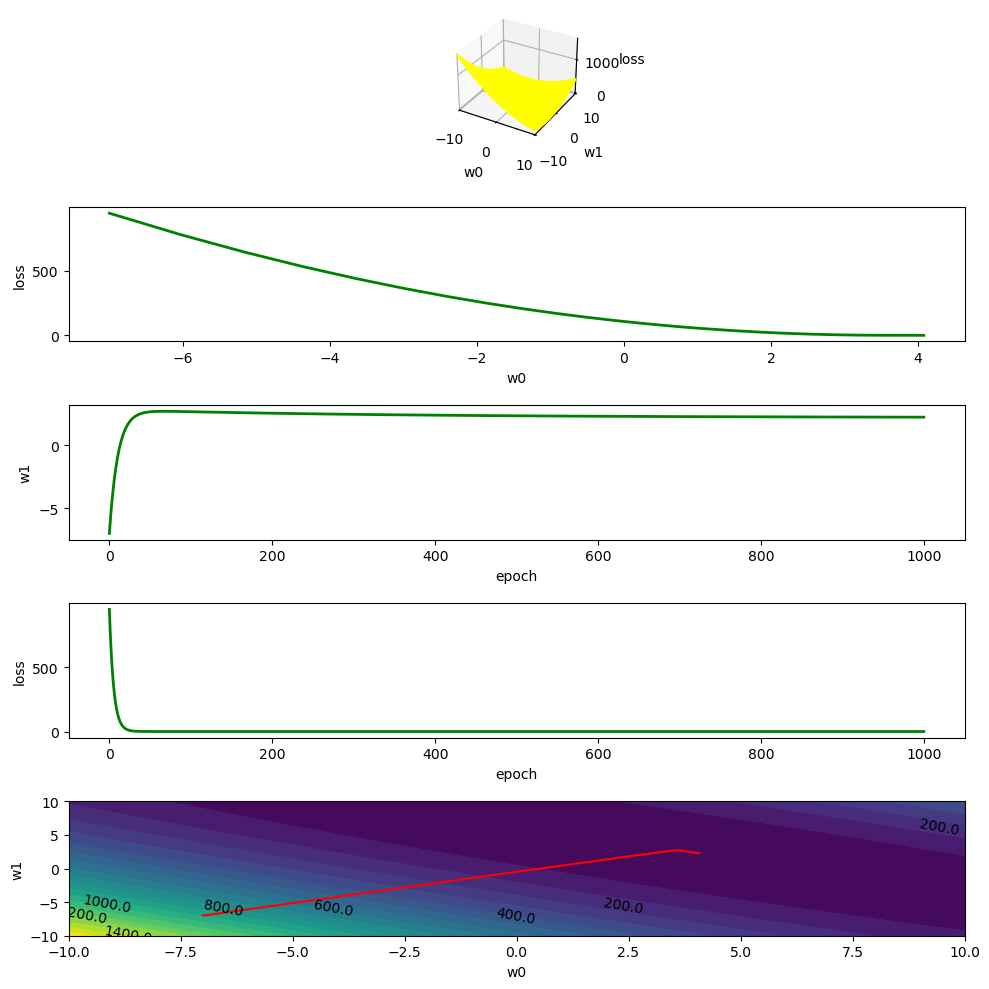

In [126]:
## 绘制损失函数
import matplotlib.pyplot as plt
import numpy as np

xs = np.array([0.5, 0.6, 0.8, 1.1, 1.4])
ys = np.array([5.0, 5.5, 6.0, 6.8, 7.0])

n = 1000
## 说一下meshgrid的作用,其实就是将x,y的坐标生成网格矩阵
## 也就是: x会沿着y轴方向复制len(y)个, y会沿着x轴方向复制len(x)个
## 所以x,y的每个坐标点组合起来就是整个网格的坐标(x,y)
w0, w1 = np.meshgrid(np.linspace(-10, 10, n), np.linspace(-10, 10, n))

loss = np.zeros_like(w0)
## 这里要理解,自变量是w0和w1, x,y是已知点
## 损失函数,是求在已知点x,y(PS:x,y是一组点),求随机点(w0, w1)参数的损失和
## 所以当w0,w1在整个坐标系范围遍历时,即可以求出在这片矩阵区域内,损失函数的形状!!!
for x, y in zip(xs, ys):
    loss += (w0 + w1 * x - y)**2 / 2

## 这里即可获得最好的参数(w0, w1), 可以和后面的值做对比, 斜率方向要一致才行
best_w0 = w0[0][int(loss.argmin() % n)]
best_w1 = w1[int(loss.argmin() / n)][0]
print(best_w0, best_w1)

w0_arr = [-7]
w1_arr = [-7]
loss_arr = [((w0_arr[-1] + w1_arr[-1] * xs - ys)**2).sum() /2]
times = 1000
lr = 0.01 ## 可以修改成0.1 0.5等测试情况,会发现大不同,梯度爆炸...所以要合理设置学习率
for i in range(times):
    w0_ = w0_arr[-1] - lr * (w0_arr[-1] + w1_arr[-1] * xs - ys).sum()
    w1_ = w1_arr[-1] - lr * (xs * (w0_arr[-1] + w1_arr[-1] * xs - ys)).sum()
    w0_arr.append(w0_)
    w1_arr.append(w1_)
    loss_ = ((w0_ + w1_ * xs - ys)**2).sum() /2
    loss_arr.append(loss_)
    # print(f"w0={w0_}, w1={w1_}, loss={loss_}")

fig = plt.figure(figsize=(10, 10))
ax3d = fig.add_subplot(511, projection='3d')
ax3d.plot_wireframe(w0, w1, loss, color='yellow', rstride=20, cstride=20)
ax3d.plot(w0_arr, w1_arr, loss_arr, c='r', linewidth=2)
ax3d.set_xlabel('w0')
ax3d.set_ylabel('w1')
ax3d.set_zlabel('loss')
ax3d.set_xlim(-10, 10)
ax3d.set_ylim(-10, 10)

ax_w0 = fig.add_subplot(512)
ax_w0.plot(w0_arr, loss_arr, c='g', linewidth=2)
ax_w0.set_xlabel('w0')
ax_w0.set_ylabel('loss')

ax_w1 = fig.add_subplot(513)
ax_w1.plot(w1_arr, c='g', linewidth=2)
ax_w1.set_xlabel('epoch')
ax_w1.set_ylabel('w1')

ax_w1 = fig.add_subplot(514)
ax_w1.plot(loss_arr, c='g', linewidth=2)
ax_w1.set_xlabel('epoch')
ax_w1.set_ylabel('loss')

ax_contour = fig.add_subplot(515)
##画等高线
cntr = ax_contour.contour(w0, w1, loss)
##填充等高线
ax_contour.contourf(w0, w1, loss, 20)
##设置等高线的文本
ax_contour.clabel(cntr,
           inline=True, ##是否在线内
           inline_spacing=5, #与线的距离
           fontsize=10,
           colors='black',
           fmt='%1.1f', ##文本格式
           )

## 画线
ax_contour.plot(w0_arr, w1_arr, color='red')
ax_contour.set_xlabel('w0')
ax_contour.set_ylabel('w1')
ax_contour.set_xlim(-10, 10)
ax_contour.set_ylim(-10, 10)


plt.tight_layout()
plt.show()

4.065692318299849 2.2634176028710415
best w0,w1: 4.1056169703701855 2.2207723503249293


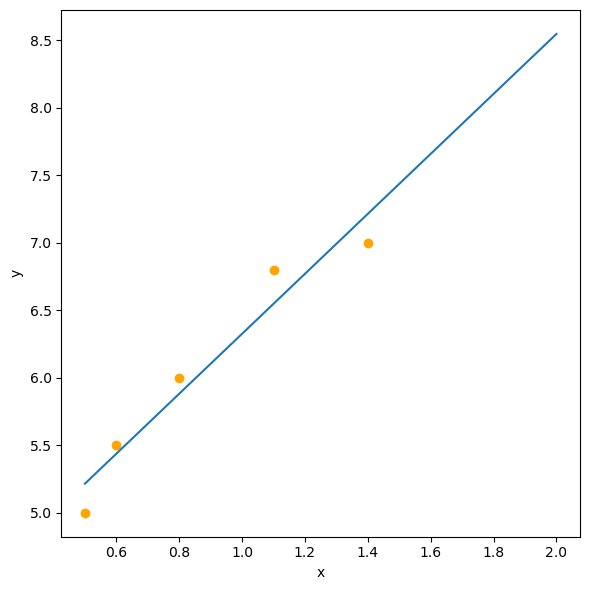

In [91]:
## 绘制拟合线

xs = np.array([0.5, 0.6, 0.8, 1.1, 1.4])
ys = np.array([5.0, 5.5, 6.0, 6.8, 7.0])
## 现在需要知道最合适的w0,w1,即可求得拟合线
## yy = best_w0 + best_w1 * xx
## 梯度下降法求回归曲线
## 损失函数,求偏导
## dw0 --> w0移动方向
## dw1 --> w1移动方向
## w0 = w0 - lr * dw0
## w1 = w1 - lr * dw1
best_w0, best_w1 = 1, 1
lr = 0.01
times = 2000
for i in range(times):
    best_w0 = best_w0 - lr * (best_w0 + best_w1 * xs - ys).sum()
    best_w1 = best_w1 - lr * (xs * (best_w0 + best_w1 * xs - ys)).sum()

w0_arr = [1]
w1_arr = [1]
times = 1000
for i in range(times):
    w0_ = w0_arr[-1] - lr * (w0_arr[-1] + w1_arr[-1] * xs - ys).sum()
    w1_ = w1_arr[-1] - lr * (xs * (w0_arr[-1] + w1_arr[-1] * xs - ys)).sum()
    w0_arr.append(w0_)
    w1_arr.append(w1_)
print(w0_arr[-1], w1_arr[-1])

print('best w0,w1:', best_w0, best_w1)
xx = np.linspace(0.5, 2, 100)
yy = best_w0 + best_w1 * xx

plt.figure(figsize=(6, 6))
plt.scatter(xs, ys, c='orange')
plt.plot(xx, yy)
plt.xlabel('x')
plt.ylabel('y')
plt.tight_layout()
plt.show()